In [23]:
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers

In [29]:
# import dataset from directory
DIR_PATH = os.path.join('cleaned_data', 'sky_dataset')
IMAGE_SIZE = 244
BATCH_SIZE = 32
# =============================
# Create Image Dataset form Directory
# =============================
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    DIR_PATH,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="training"
)
ds_val = tf.keras.preprocessing.image_dataset_from_directory(
    DIR_PATH,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="validation"
)

Found 450 files belonging to 3 classes.
Using 405 files for training.
Found 450 files belonging to 3 classes.
Using 45 files for validation.


In [ ]:
def augment(image, label):
    image = tf.image.random_brightness(image, max_delta=0.1),
    image = tf.image.random_contrast(image, lower=0.1, upper=0.2)
    image = tf.image.random_flip_left_right(image)
    return image, label

In [10]:
def normalize_img(image, label):
    image = image / 225.0
    return image, label

In [26]:
# load imagee & labels
train_images = list(ds_train.map(lambda x, y: x))
train_labels = list(ds_train.map(lambda x, y: y))

In [24]:
x_train, y_train = np.asarray(ds_train)

TypeError: iteration over a 0-d array

In [27]:
test_image = train_images[0][0]
test_label = train_labels[0][0]


In [28]:
len(np.asarray(train_images))

/Users/allynbao/miniconda3/envs/tensorflow/lib/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


26

In [ ]:
def data_processing(dataset):
    dataset = dataset.map(augment, num_parallel_calls=AUTOTUNE)
    dataset = dataset.map(normalize_img, num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.cashe()
    dataset = dataset.prefetch(AUTOTUNE)
    return dataset

In [ ]:
# data processing
AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = data_processing(ds_train)
ds_val = data_processing(ds_val)


In [39]:
# build model
model = tf.keras.models.Sequential(
    [
        layers.Conv2D(IMAGE_SIZE, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(3, activation='softmax')
    ]
)

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 242, 242, 244)     6832      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 121, 121, 244)     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 119, 119, 64)      140608    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 59, 59, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 57, 57, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 64)       

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
history = model.fit(ds_train, epochs=10, validation_data=ds_val)

Epoch 1/10


/Users/allynbao/miniconda3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(
2022-11-13 18:17:03.054362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - ETA: 0s - loss: 3.7236 - accuracy: 0.4370

2022-11-13 18:17:18.802666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 18s 777ms/step - loss: 3.7236 - accuracy: 0.4370 - val_loss: 1.0124 - val_accuracy: 0.5556
Epoch 2/10
13/13 [==============================] - 18s 756ms/step - loss: 0.7614 - accuracy: 0.6543 - val_loss: 0.7611 - val_accuracy: 0.8000
Epoch 3/10
13/13 [==============================] - 16s 678ms/step - loss: 0.6652 - accuracy: 0.7481 - val_loss: 0.8761 - val_accuracy: 0.6889
Epoch 4/10
13/13 [==============================] - 17s 692ms/step - loss: 0.5373 - accuracy: 0.8173 - val_loss: 0.6235 - val_accuracy: 0.8000
Epoch 5/10
13/13 [==============================] - 16s 694ms/step - loss: 0.4633 - accuracy: 0.8173 - val_loss: 0.5251 - val_accuracy: 0.8000
Epoch 6/10
13/13 [==============================] - 16s 678ms/step - loss: 0.3321 - accuracy: 0.8667 - val_loss: 0.5779 - val_accuracy: 0.8222
Epoch 7/10
13/13 [==============================] - 17s 716ms/step - loss: 0.3412 - accuracy: 0.8716 - val_loss: 0.7145 - val_accuracy: 0.7778
Epoch 8/10

In [44]:
test_loss, test_acc = model.evaluate(ds_val)
print(test_acc)

2/2 [==============================] - 2s 61ms/step - loss: 0.7890 - accuracy: 0.8000
0.800000011920929


In [45]:
acc = history.history['accuracy']
print(acc)

[0.43703705072402954, 0.654321014881134, 0.7481482028961182, 0.8172839879989624, 0.8172839879989624, 0.8666667342185974, 0.8716049790382385, 0.8518518805503845, 0.8518518805503845, 0.8864197731018066]


In [46]:
model.save(os.path.join("models", "checkpoints", "sky_recognition_basic_v1.h5"))

In [65]:
a = tf.constant([[1, 2, 3], [1, 2, 3]])
tf.reshape(a, [-1, 2, 3])
print(np.asarray(a))

[[1 2 3]
 [1 2 3]]


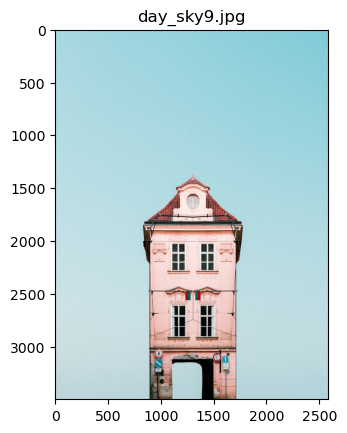

day_sky9.jpg sunset


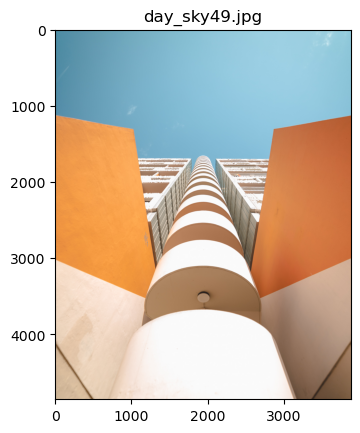

day_sky49.jpg sunset


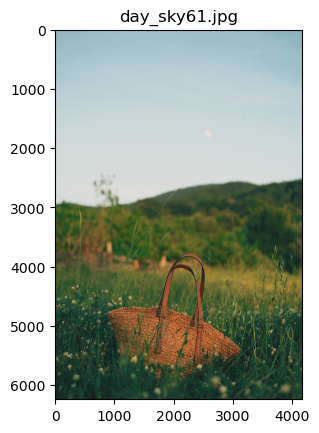

day_sky61.jpg sunset


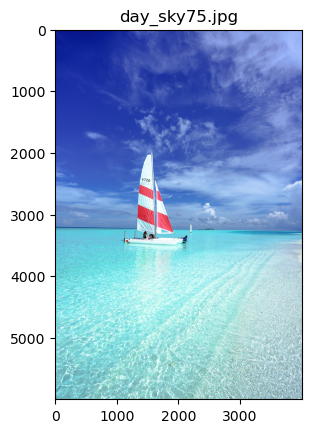

day_sky75.jpg sunset


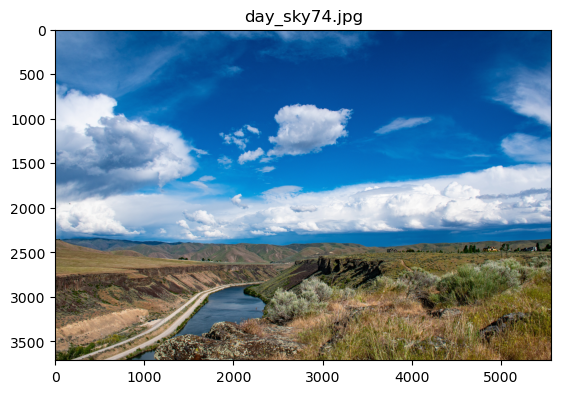

day_sky74.jpg sunset


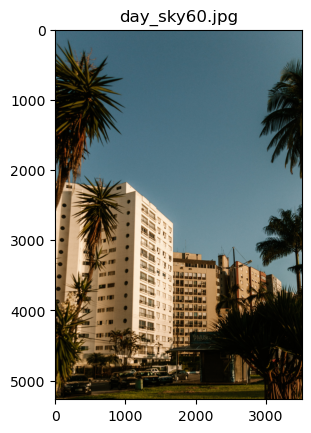

day_sky60.jpg sunset


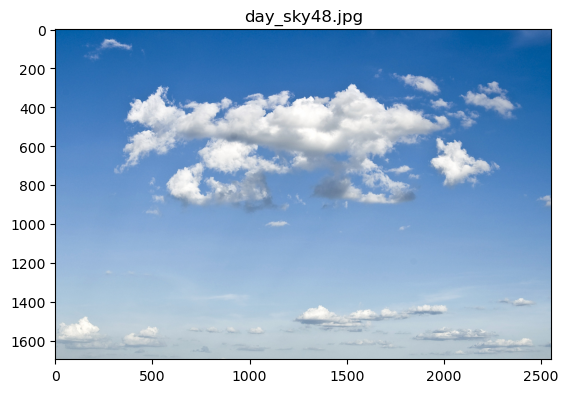

day_sky48.jpg sunset


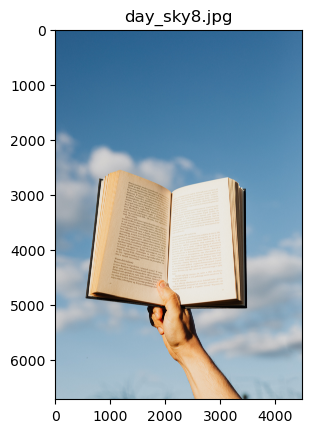

day_sky8.jpg sunset


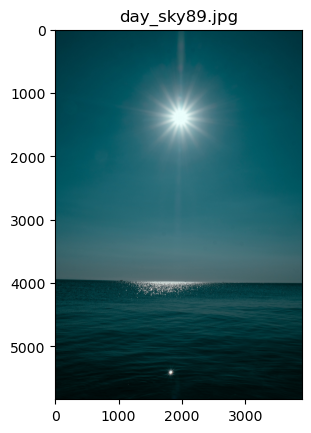

day_sky89.jpg sunset


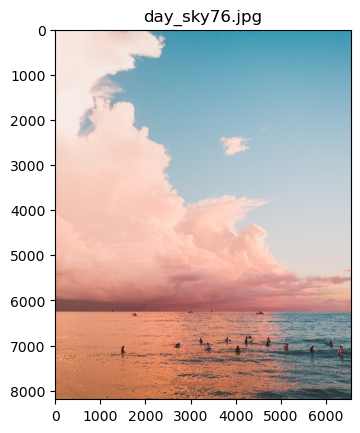

day_sky76.jpg sunset


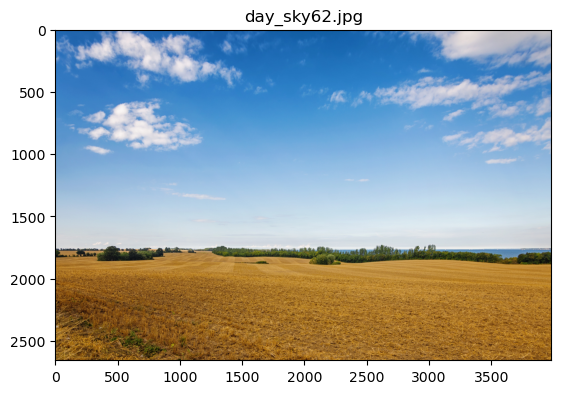

day_sky62.jpg sunset


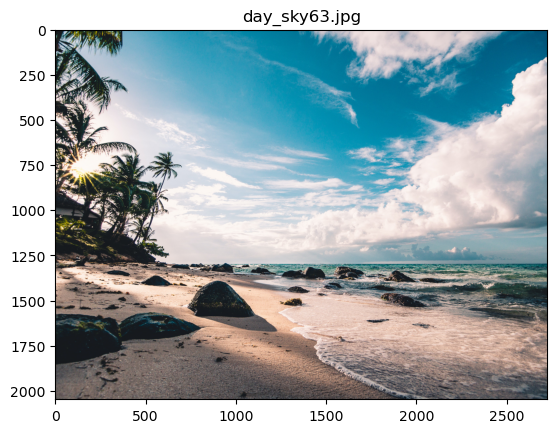

day_sky63.jpg sunset


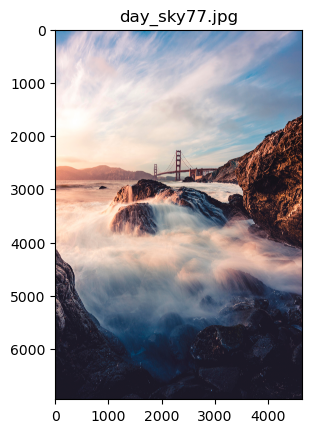

day_sky77.jpg sunset


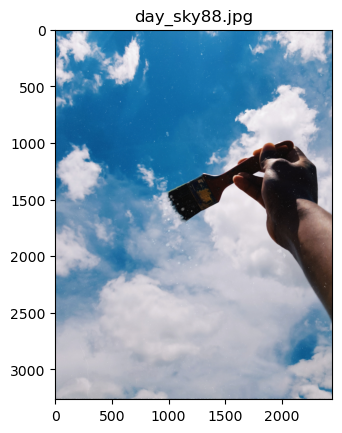

day_sky88.jpg sunset


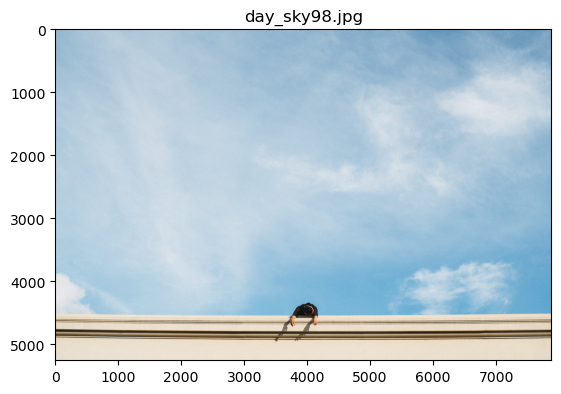

day_sky98.jpg sunset


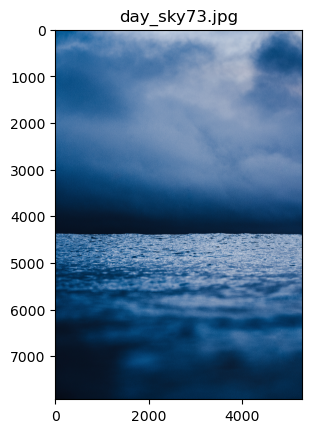

day_sky73.jpg sunset


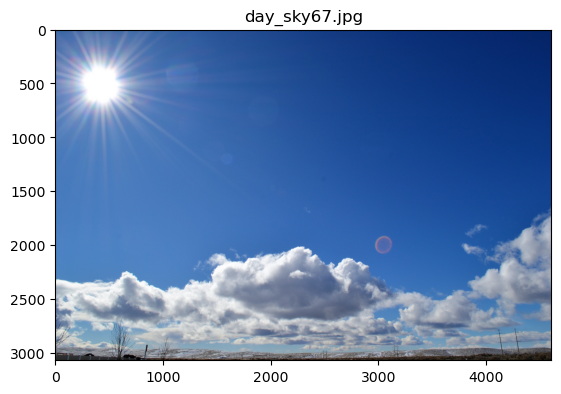

day_sky67.jpg sunset


UnidentifiedImageError: cannot identify image file 'data/daytime sky/.DS_Store'

In [70]:
# test sample images:
import matplotlib.pyplot as plt
SAMPLE_DIR = os.path.join('data', 'daytime sky')
image_list = os.listdir(SAMPLE_DIR)
image_name = ''
sample_image = None
resized_img = None
for image_name in image_list:
    image_path = os.path.join(SAMPLE_DIR, image_name)
    sample_image = plt.imread(image_path)
    plt.imshow(np.array(sample_image, dtype=int))
    plt.title(image_name)
    plt.show()

    #prediction
    resized_img = tf.image.resize(
        images=sample_image,
        size=[IMAGE_SIZE, IMAGE_SIZE],
        preserve_aspect_ratio=False,
    )
    formatted_img = tf.convert_to_tensor(np.asarray(resized_img) / 255.0)
    formatted_img = tf.reshape(formatted_img, [-1, IMAGE_SIZE, IMAGE_SIZE, 3])
    predictions = model.predict([tf.convert_to_tensor(np.array(formatted_img))])

    classes = ['sunset', 'sky', 'no_sky']
    index = predictions[0].argmax()
    print(image_name, classes[index])